# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from consav import elapsed

from FullHANKSAMModel import FullHANKSAMModelClass
from figures import create_fig, save_fig, vary_par, IRF_figs

# Setup

In [2]:
model = FullHANKSAMModelClass(name='baseline')
model.load_parameters('calibration')
model.load_data()

In [3]:
model_HtM_debt = model.copy()
model_HtM_debt.load_parameters('calibration_HtM_debt')
model_HtM_debt.load_data()

In [4]:
models = [model,model_HtM_debt]

# Solve

In [5]:
for model_ in models:
    model_.set_macros(wage_setting='rule')
    model_.find_ss()
    model_.compute_jacs(skip_shocks=True)
    model_.find_transition_path()

# Varying parameters

In [6]:
values_dict = {}
values_dict['eta_u'] = [-0.001,-0.005,-0.01,-0.02,-0.04]

latex_dict = {}
latex_dict['eta_u'] = '\\eta_u'

eta_u
baseline
baseline: eta_u = 0.0000
eta_u = -0.0010: var_u =  1.35, C_drop_ss = -19.2, , C_drop_ini_ss =  -7.5
eta_u = -0.0050: var_u =  1.25, C_drop_ss = -19.2, , C_drop_ini_ss =  -7.5
eta_u = -0.0100: var_u =  1.13, C_drop_ss = -19.2, , C_drop_ini_ss =  -7.5
eta_u = -0.0200: var_u =  0.95, C_drop_ss = -19.2, , C_drop_ini_ss =  -7.5
eta_u = -0.0400: var_u =  0.69, C_drop_ss = -19.2, , C_drop_ini_ss =  -7.5
completed in 3.0 mins 39 secs

HtM_debt
baseline: eta_u = 0.0000
eta_u = -0.0010: var_u =  0.89, C_drop_ss = -21.2, , C_drop_ini_ss = -10.6
eta_u = -0.0050: var_u =  0.83, C_drop_ss = -21.2, , C_drop_ini_ss = -10.6
eta_u = -0.0100: var_u =  0.77, C_drop_ss = -21.2, , C_drop_ini_ss = -10.6
eta_u = -0.0200: var_u =  0.67, C_drop_ss = -21.2, , C_drop_ini_ss = -10.6
eta_u = -0.0400: var_u =  0.51, C_drop_ss = -21.2, , C_drop_ini_ss = -10.6
completed in 4.0 mins 13 secs




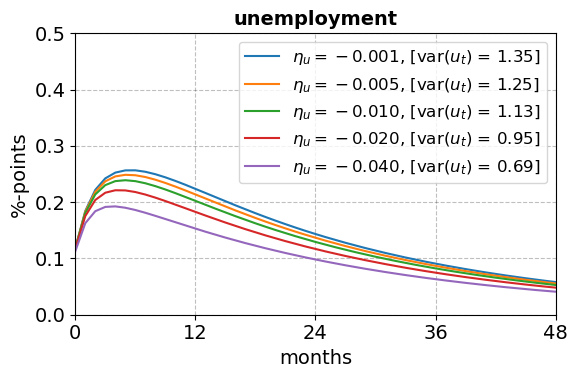

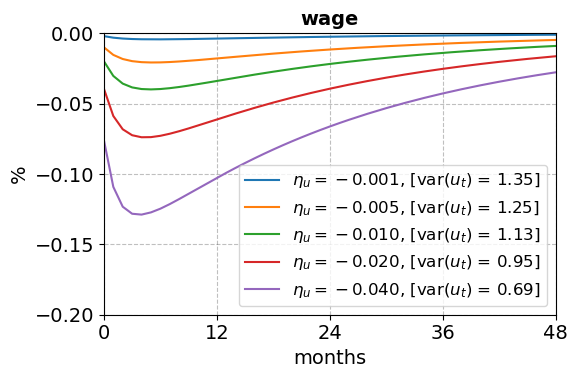

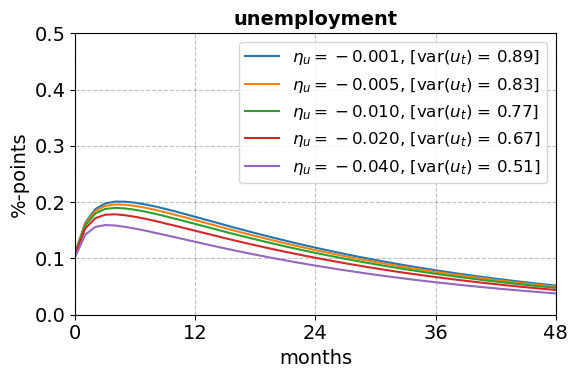

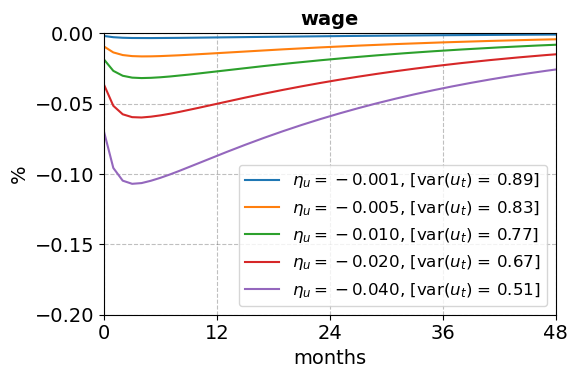

In [7]:
for parname in values_dict.keys():

    print(f'{parname}')
    
    for model_,name in [(model,'baseline'),(model_HtM_debt,'HtM_debt')]:
        
        print(f'{name}')
        
        values = values_dict[parname]
        models_ = vary_par(model_,parname,values,do_print=True,show_info=True)
        labels = [f'${latex_dict[parname]} = {model_.par.__dict__[parname]:.3f}$, [var($u_t$) = {model_.moms["var_u"]:.2f}]' for model_ in models_]
        
        IRF_figs(models_,labels,None,colors,
                 title='unemployment',
                 prefix=f'robustness_{name}',
                 parname=parname,
                 varname='u',
                 legend=True,
                 ylim=[0.0,0.5,])
        
        IRF_figs(models_,labels,None,colors,
                 title='wage',
                 prefix=f'robustness_{name}',
                 parname=parname,
                 varname='w',
                 legend=True,
                 ylim=[-0.2,0.0])        
        
        print('')
        
    print('')
        